In [1]:
import numpy as np 
import sys
import json
import os 

parent_path = os.path.abspath(os.path.join('..'))
if parent_path not in sys.path:
    sys.path.append(parent_path)


In [2]:
import cv2 
import matplotlib.pyplot as plt 
import utilities.gaze
from utilities.gaze import draw_gaze
from scipy.spatial.transform import Rotation as R

In [3]:
image_test_path = f'{parent_path}/data/UnityEyes/imgs/5.jpg'
json_path = image_test_path
image_test_path = cv2.imread(image_test_path)
image_test_path = cv2.cvtColor(image_test_path, cv2.COLOR_BGR2RGB)

(600, 800, 3)

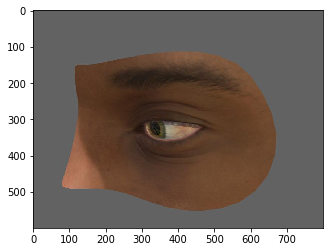

In [4]:
plt.imshow(image_test_path)
image_test_path.shape

In [5]:
import json 
with open (f'{json_path[:-3]}json') as json_file:
    json_data = json.load(json_file)
print(json.dumps(json_data, indent =2))

{
  "interior_margin_2d": [
    "(313.2946, 274.5373, 9.6834)",
    "(311.5983, 286.0856, 9.7262)",
    "(315.4099, 288.0958, 9.4290)",
    "(337.0252, 293.9048, 9.0613)",
    "(372.8789, 293.4707, 8.8558)",
    "(400.7459, 291.5045, 8.8023)",
    "(424.1393, 288.3903, 8.8511)",
    "(445.3862, 285.5871, 8.9781)",
    "(460.7832, 280.6684, 9.1490)",
    "(452.6216, 272.4527, 9.0943)",
    "(432.0121, 258.7635, 9.0187)",
    "(406.0506, 248.7301, 9.0133)",
    "(375.1023, 244.5833, 9.1104)",
    "(347.9734, 245.5097, 9.2570)",
    "(326.5410, 253.1480, 9.4805)",
    "(317.2099, 263.3910, 9.6940)"
  ],
  "caruncle_2d": [
    "(304.2614, 267.5528, 9.8375)",
    "(304.6198, 276.7243, 9.8909)",
    "(301.5902, 279.1839, 9.9081)",
    "(290.7942, 273.6256, 9.9206)",
    "(294.9262, 272.6171, 9.9215)",
    "(294.3904, 267.3090, 9.9205)",
    "(288.5609, 270.9980, 9.9135)"
  ],
  "iris_2d": [
    "(312.0023, 279.3323, 9.8262)",
    "(310.9478, 287.2253, 9.7903)",
    "(310.9571, 294.6865, 9.73

In [6]:
image_height, image_width = image_test_path.shape[:2]

In [7]:
print(image_height, image_width)


600 800


In [8]:
ih_2, iw_2 = 0.5 * image_height, 0.5 * image_width

32


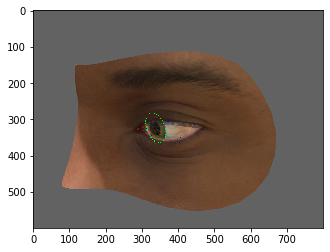

In [9]:
def process_coords(coords_list):
    coords = [eval (l) for l in coords_list]
    return np.array([(x, image_height-y, z) for (x, y, z) in coords])
interior_landmarks = process_coords(json_data['interior_margin_2d'])
caruncle_landmarks = process_coords(json_data['caruncle_2d'])
iris_landmarks = process_coords(json_data['iris_2d'])

landmarks_img = image_test_path.copy()
print(len(iris_landmarks))
for (x, y, z) in interior_landmarks:
    landmarks_img = cv2.circle(landmarks_img, (int(x), int(y)), 1, color=(0, 0, 255), thickness=-1)
for (x, y, z) in caruncle_landmarks:
    landmarks_img = cv2.circle(landmarks_img, (int(x), int(y)), 1, color=(255, 0, 0), thickness=-1)
for (x, y, z) in iris_landmarks:
    landmarks_img = cv2.circle(landmarks_img, (int(x), int(y)), 1, color=(0, 255, 0), thickness=-1)
plt.imshow(landmarks_img)

In [10]:
caruncle_landmarks[:, :2]


array([[304.2614, 332.4472],
       [304.6198, 323.2757],
       [301.5902, 320.8161],
       [290.7942, 326.3744],
       [294.9262, 327.3829],
       [294.3904, 332.691 ],
       [288.5609, 329.002 ]])

In [11]:
caruncle_landmarks[:,[0]]
# np.mean(caruncle1)


array([[304.2614],
       [304.6198],
       [301.5902],
       [290.7942],
       [294.9262],
       [294.3904],
       [288.5609]])

In [12]:
np.mean(caruncle_landmarks[:,:2], axis=0)

array([297.02044286, 327.42704286])

In [13]:
np.amin(interior_landmarks[:, :2], axis = 0)

array([311.5983, 306.0952])

In [14]:
interior_landmarks

array([[313.2946, 325.4627,   9.6834],
       [311.5983, 313.9144,   9.7262],
       [315.4099, 311.9042,   9.429 ],
       [337.0252, 306.0952,   9.0613],
       [372.8789, 306.5293,   8.8558],
       [400.7459, 308.4955,   8.8023],
       [424.1393, 311.6097,   8.8511],
       [445.3862, 314.4129,   8.9781],
       [460.7832, 319.3316,   9.149 ],
       [452.6216, 327.5473,   9.0943],
       [432.0121, 341.2365,   9.0187],
       [406.0506, 351.2699,   9.0133],
       [375.1023, 355.4167,   9.1104],
       [347.9734, 354.4903,   9.257 ],
       [326.541 , 346.852 ,   9.4805],
       [317.2099, 336.609 ,   9.694 ]])

{
  "interior_margin_2d": [
    "(312.7325, 282.9888, 9.7947)",
    "(311.2485, 301.0775, 9.7833)",
    "(319.9195, 314.4633, 9.4802)",
    "(337.9854, 323.3019, 9.1831)",
    "(367.9517, 320.6808, 8.8111)",
    "(404.6841, 305.9804, 8.7447)",
    "(429.1161, 292.4188, 8.8657)",
    "(443.1143, 279.0277, 8.9808)",
    "(450.3929, 268.7822, 9.0929)",
    "(441.0293, 259.1880, 9.0769)",
    "(428.4157, 254.0677, 9.0362)",
    "(403.3621, 247.1422, 9.0259)",
    "(370.2010, 247.0631, 9.1104)",
    "(342.9549, 252.9732, 9.3102)",
    "(324.0576, 260.3954, 9.6214)",
    "(316.9303, 266.3593, 9.8603)"
  ],
  "caruncle_2d": [
    "(308.5059, 267.3830, 10.0239)",
    "(306.1961, 276.7448, 10.0069)",
    "(306.6841, 290.3666, 9.9531)",
    "(296.3676, 278.4193, 10.0012)",
    "(297.7841, 273.1226, 10.0177)",
    "(295.2662, 268.3332, 10.0122)",
    "(294.2726, 271.3791, 9.9992)"
  ],
  "iris_2d": [
    "(341.0341, 313.9893, 9.1124)",
    "(342.7548, 321.6234, 9.1196)",
    "(345.8833, 328.8160,

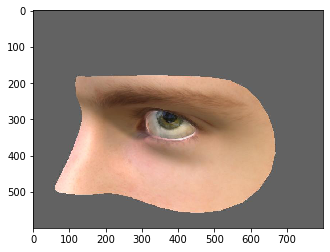

In [15]:
image_test_path_2 = f'{parent_path}/data/UnityEyes/imgs/3.jpg'
json_path = image_test_path_2
image_test_path_2 = cv2.imread(image_test_path_2)
image_test_path_2 = cv2.cvtColor(image_test_path_2, cv2.COLOR_BGR2RGB)

import json 
with open (f'{json_path[:-3]}json') as json_file:
    json_data = json.load(json_file)
print(json.dumps(json_data, indent =2))
plt.imshow(image_test_path_2)

32


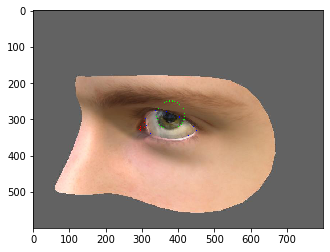

In [16]:
def process_coords(coords_list):
    coords = [eval (l) for l in coords_list]
    return np.array([(x, image_height-y, z) for (x, y, z) in coords])
interior_landmarks = process_coords(json_data['interior_margin_2d'])
caruncle_landmarks = process_coords(json_data['caruncle_2d'])
iris_landmarks = process_coords(json_data['iris_2d'])

landmarks_img = image_test_path_2.copy()
print(len(iris_landmarks))
for (x, y, z) in interior_landmarks:
    landmarks_img = cv2.circle(landmarks_img, (int(x), int(y)), 1, color=(0, 0, 255), thickness=-1)
for (x, y, z) in caruncle_landmarks:
    landmarks_img = cv2.circle(landmarks_img, (int(x), int(y)), 1, color=(255, 0, 0), thickness=-1)
for (x, y, z) in iris_landmarks:
    landmarks_img = cv2.circle(landmarks_img, (int(x), int(y)), 1, color=(0, 255, 0), thickness=-1)
plt.imshow(landmarks_img)

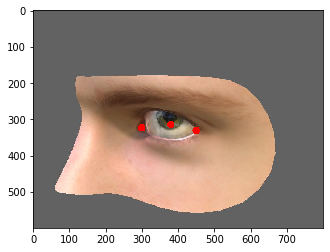

In [19]:
left_corner = np.mean(caruncle_landmarks[:, :2], axis=0)
right_corner = interior_landmarks[8, :2]
eye_width =  1.5   * abs(left_corner[0] - right_corner[0])
# eye_middle = np.mean(interior_landmarks[:, :2], axis=0)
#                       np.amax(interior_landmarks[:, :2], axis=0)], axis=0)
eye_middle = np.mean([np.amin(interior_landmarks[:, :2], axis=0),
                          np.amax(interior_landmarks[:, :2], axis=0)], axis=0)
# image_test_path_2 = f'{parent_path}/data/UnityEyes/imgs/3.jpg'



lc = [int(x) for x in left_corner]
rc = [int(x) for x in right_corner]
em = [int(x) for x in eye_middle]
landmarks_img1 = image_test_path_2.copy()
landmarks_img1 = cv2.circle(landmarks_img1, tuple(lc), 10, color=(255, 0, 0), thickness=-1)
landmarks_img1 = cv2.circle(landmarks_img1, tuple(rc), 10, color=(255, 0, 0), thickness=-1)
landmarks_img1 = cv2.circle(landmarks_img1, tuple(em), 10, color=(255, 0, 0), thickness=-1)
plt.imshow(landmarks_img1)

In [56]:
def preprocess_unity_eyes_image(image, json_data, out_h=90, out_w=150):
    """
    prep function to segment the eyes"""
    def process_coords(coords_list):
        coords = [eval(l) for l in coords_list]
        return np.array([(x, image_height, z)  for (x, y, z) in coords])
    interior_landmarks = process_coords(json_data['interior_margin_2d'])
    caruncle_landmarks = process_coords(json_data['caruncle_2d'])
    iris_landmarks = process_coords(json_data['iris_2d'])
    
    left_corner = np.mean(caruncle_landmarks[:, :2], axis = 0)
    right_corner = interior_landmarks[8: :2]
    eye_width = 1.5 * abs(left_corner[0] - right_corner[0])
    eye_middle = np.mean([np.amin(interior_landmarks[:, :2], axis=0),
                          np.amax(interior_landmarks[:, :2], axis=0)], axis=0)
    #Normalizing to eye width
    
    scaler = out_w/eye_width 
    print(scaler)
    
    translate = np.asmatrix(np.eye(3))
    translate[0, 2] = out_w/2
    translate[1, 2] = out_h / 2
    
    scaler_mat = np.asmatrix(np.eye(3))

    scaler_mat[0, 0] = scaler
    scaler_mat[1, 1] = scaler
    
    angle = np.random.normal(0, 1) * 20 * np.pi/180
    rotation = R.from_rotvec([0, 0, angle]).as_matrix()

    transform = recenter * rotation * translate * scale_mat
    transform_inv = np.linalg.inv(transform)
    
    # Apply transforms
    eye = cv2.warpAffine(img, transform[:2], (ow, oh))

    # Normalize eye image

    # Gaze
    # Convert look vector to gaze direction in polar angles
    look_vec = np.array(eval(json_data['eye_details']['look_vec']))[:3].reshape((1, 3))
    look_vec = np.matmul(look_vec, rotation)

    gaze = util.gaze.vector_to_pitchyaw(-look_vec).flatten()
    gaze = gaze.astype(np.float32)

    eye = cv2.GaussianBlur(eye, (5,5), 0.001)
    return {
        'img': eye,
        'transform': transform,
        'transform_inv': transform_inv,
        'eye_middle': eye_middle,
        'gaze': gaze
    }

In [ ]:
abs(left_corner[0] - right_corner[0])

In [28]:
translate = np.asmatrix(np.eye(3))
translate

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [32]:
translate[0, 2] = -eye_middle[0] * (150/200)
translate[1, 2] = -eye_middle[1] * (1500/200)

In [33]:
translate

matrix([[ 1.00000000e+00,  0.00000000e+00, -2.85615525e+02],
        [ 0.00000000e+00,  1.00000000e+00, -2.36113125e+03],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [35]:
recenter = np.asmatrix(np.eye(3))
recenter[0, 2] = 150/2
recenter[1, 2] = 90/2
recenter

matrix([[ 1.,  0., 75.],
        [ 0.,  1., 45.],
        [ 0.,  0.,  1.]])

In [37]:
scale_mat = np.asmatrix(np.eye(3))
scale_mat [0, 0] = 150/200
scale_mat[1, 1] = 150/200
scale_mat

matrix([[0.75, 0.  , 0.  ],
        [0.  , 0.75, 0.  ],
        [0.  , 0.  , 1.  ]])

In [40]:
angle = np.random.normal(0, 1) * 20 * np.pi/180
angle

0.19778620198689753

In [42]:
rotation = R.from_rotvec([0, 0, angle]).as_matrix

In [63]:
# Re-center so that eye-middle is at the center of the image
def preprocess_unityeyes_image(img, json_data, oh=90, ow=150):
    # Prepare to segment eye image
    
    def process_coords(coords_list):
        coords = [eval(l) for l in coords_list]
        return np.array([(x, image_height-y, z) for (x, y, z) in coords])
    
    interior_landmarks = process_coords(json_data['interior_margin_2d'])
    caruncle_landmarks = process_coords(json_data['caruncle_2d'])
    iris_landmarks = process_coords(json_data['iris_2d'])

    left_corner = np.mean(caruncle_landmarks[:, :2], axis=0)
    right_corner = interior_landmarks[8, :2]
    eye_width = 1.5 * abs(left_corner[0] - right_corner[0])
    eye_middle = np.mean([np.amin(interior_landmarks[:, :2], axis=0),
                          np.amax(interior_landmarks[:, :2], axis=0)], axis=0)

    # Normalize to eye width.
    scale = ow/eye_width

    translate = np.asmatrix(np.eye(3))
    translate[0, 2] = -eye_middle[0] * scale
    translate[1, 2] = -eye_middle[1] * scale

    recenter = np.asmatrix(np.eye(3))
    recenter[0, 2] = ow/2
    recenter[1, 2] = oh/2

    scale_mat = np.asmatrix(np.eye(3))
    scale_mat[0, 0] = scale
    scale_mat[1, 1] = scale

    angle = np.random.normal(0, 1) * 20 * np.pi/180
    rotation = R.from_rotvec([0, 0, angle]).as_matrix()

    transform = recenter * rotation * translate * scale_mat
    transform_inv = np.linalg.inv(transform)
    
    # Apply transforms
    eye = cv2.warpAffine(img, transform[:2], (ow, oh))

    # Normalize eye image

    # Gaze
    # Convert look vector to gaze direction in polar angles
    look_vec = np.array(eval(json_data['eye_details']['look_vec']))[:3].reshape((1, 3))
    look_vec = np.matmul(look_vec, rotation)

    gaze = utilities.gaze.vector_to_pitchyaw(-look_vec).flatten()
    gaze = gaze.astype(np.float32)

    eye = cv2.GaussianBlur(eye, (5,5), 0.001)
    return {
        'img': eye,
        'transform': transform,
        'transform_inv': transform_inv,
        'eye_middle': eye_middle,
        'gaze': gaze
    }



[-0.17292225  0.23251238]
(90, 150, 3)


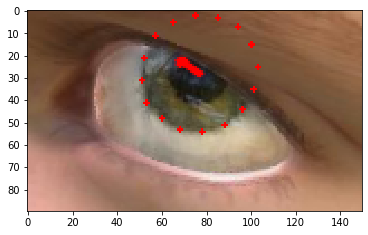

In [65]:
eye_entry = preprocess_unityeyes_image(image_test_path_2, json_data)

eye_img = eye_entry['img'].copy()
transform = eye_entry['transform']

iris_center = np.mean(iris_landmarks, axis=0)[:2]


landmarks = np.concatenate([interior_landmarks[:, :2],  # 8
                            iris_landmarks[::2, :2],  # 8
                            iris_center.reshape((1, 2)),
                            [[iw_2, ih_2]],  # Eyeball center
                            ])  # 18 in total

landmarks = np.asmatrix(np.pad(landmarks, ((0, 0), (0, 1)), 'constant', constant_values=1))
landmarks = np.asarray(landmarks * transform[:2].T)
landmarks = landmarks.astype(np.float32)

for (x, y) in landmarks[16:32]:
    eye_img = cv2.circle(eye_img, (int(x), int(y)), 1, color=(255, 0, 0), thickness=-1)
    
eye_img = draw_gaze(eye_img, landmarks[-2], eye_entry['gaze'], color=(255, 0, 0))

gaze = eye_entry['gaze']
print(gaze)
plt.imshow(eye_img)
print(eye_entry['img'].shape)

In [76]:
def get_heatmaps(shape, landmarks):
    def guassian_2d(shape, center, sigma=1.0):
        """Generates heatmap with single 2D guassian"""
        xs = np.arange(0.5, shape[1] + 0.5, step=1.0, dtype=np.float32)
        ys = np.expand_dims(np.arange(0.5, shape[0] + 0.5, step=1.0, dtype=np.float32), -1)
        alpha = -0.5 / (sigma**2)
        heatmap = np.exp(alpha * ((xs - center[0])**2 + (ys - center[1])**2))
        return heatmap
    heatmaps = []

    for (x, y) in landmarks:
        heatmaps.append(guassian_2d(shape, (int(x), int(y)), sigma=5.0))
    return heatmaps

In [82]:
heatmaps = get_heatmaps((90,150), landmarks)
len(heatmaps)

34

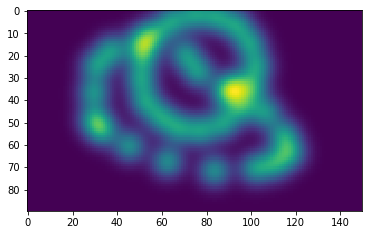

In [84]:
merged_heatmaps = np.mean(heatmaps, axis =0)
merged_heatmaps
plt.imshow(merged_heatmaps)